### SEALEVEL_EUR_PHY_L4_MY_008_068

In [22]:
import numpy as np                                                                                                                                                                                  
import xarray as xr                                                                                                                                                                                 
import os                                                                                                                                                                                           
import matplotlib.pyplot as plt                                                                                                                                                                     
import matplotlib.cm as cm    
import matplotlib.pyplot as plt
import numpy as np                                                                                                                                                                                  
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.reset_defaults()
sns.set_context("talk", font_scale=0.8)
import warnings
warnings.filterwarnings('ignore')
from myfuncts2  import *
%load_ext autoreload
%autoreload 2
from scipy.ndimage import gaussian_filter1d
                                                                                                                                                                                                    
  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


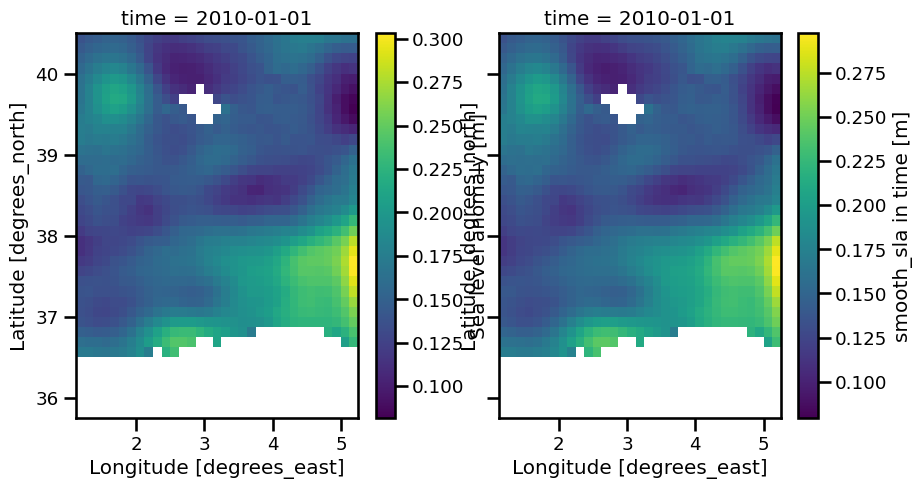

In [24]:
from mpsd import *
from myfuncts2  import *

ds = xr.open_mfdataset('data/SSHL4.nc')

filter25km =create_filter(10000)


vari="sla"
varis="sla_s"
ds=ds.assign(sla_s=ds[vari], dims=['time,','latitude', 'longitude'])
a=gaussian_filter1d(ds[varis], 1, axis=0)
ds[varis].values=a
ds.sla_s.attrs['long_name'] = 'smooth_sla in time'

plt.rcParams["figure.figsize"] = [10, 5]
f, ax = plt.subplots(1, 2, sharey=True)

ds=ds.rename({'longitude': 'lon','latitude': 'lat'})


ds[vari][0,:,:].plot(ax=ax[0],x='lon', y='lat')
ds[varis][0,:,:].plot(ax=ax[1],x='lon', y='lat')


plt.show()


In [25]:
from myfuncts2  import *
ds1=ds
psd_oi1, psds_score, psdt_score  = psd_based_scores(ds, ds1, vari, varis)

print(psds_score, psdt_score)

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
0.26 4.0


In [26]:
import xarray as xr
import numpy
import hvplot.xarray
import pyinterp
import dask
import warnings
import xrft
import os
import sys
import pandas as pd
import logging
warnings.filterwarnings('ignore')
data = [[
         psds_score, 
         psdt_score,
        '2days_in time']]

Leaderboard = pd.DataFrame(data, 
                           columns=[
                                    'λx (degree)', 
                                    'λt (days)', 
                                    'Notes'])
print("Summary of the leaderboard metrics:")
Leaderboard


Summary of the leaderboard metrics:


,λx (degree),λt (days),Notes
0,0.26,4.0,2days_in time


np


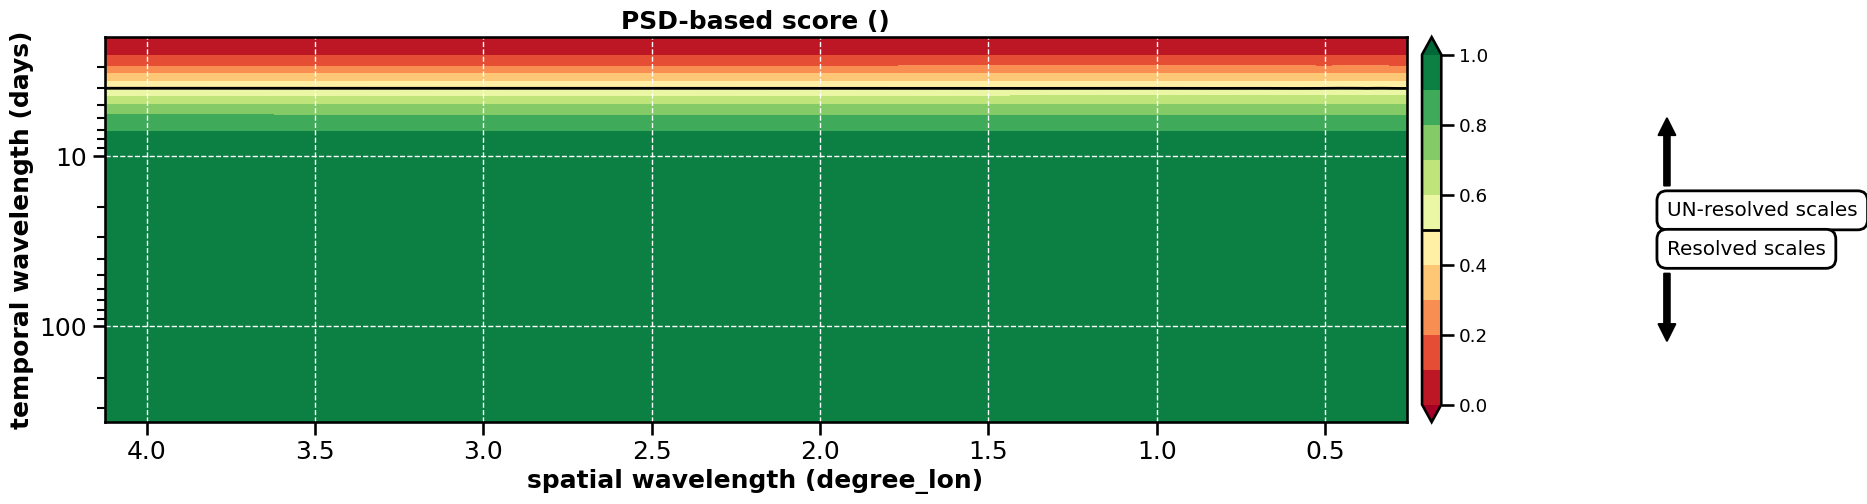

In [27]:
from myfuncts2  import *
plt.rcParams["figure.figsize"] = [5,5]

plot_psd_score(psd_oi1)

In [21]:
ds.lon.max()

<xarray.DataArray 'lon' ()>
array(5.1875, dtype=float32)